In [660]:
#importing required libraries
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import os
import torch
from tqdm import tqdm
np.random.seed(42)

In [661]:
#Reading the csv file of dataset
df  = pd.read_csv('/Users/akashpatel/Tokyo.csv')

In [662]:
# printing the dataset
df.head()

,Pid,Departure_time,Gender,Age,Occupation,Trip_type,Origin,Destination
0,264045,2008-10-01 09:00:00,2,10,9,1,11412,11414
1,268173,2008-10-01 10:42:00,2,15,14,4,12302,12303
2,277618,2008-10-01 13:35:00,2,5,14,8,13131,13110
3,277618,2008-10-01 15:02:00,2,5,14,4,13110,13110
4,264180,2008-10-01 12:45:00,1,14,15,4,12304,11421


In [664]:
# information about the dataset
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790613 entries, 0 to 790612
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Pid             790613 non-null  int64 
 1   Departure_time  790613 non-null  object
 2   Gender          790613 non-null  int64 
 3   Age             790613 non-null  int64 
 4   Occupation      790613 non-null  int64 
 5   Trip_type       790613 non-null  int64 
 6   Origin          790613 non-null  int64 
 7   Destination     790613 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 48.3+ MB


,Pid,Gender,Age,Occupation,Trip_type,Origin,Destination
count,790613.000000,790613.000000,790613.000000,790613.000000,790613.000000,790613.000000,790613.000000
mean,286422.961516,1.513932,8.395085,10.452158,4.663179,21159.079469,18984.366843
std,170333.821778,0.499806,3.891511,10.980001,5.754973,17367.967016,17570.281323
min,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000
25%,136649.000000,1.000000,6.000000,7.000000,1.000000,6311.000000,4111.000000
50%,286021.000000,2.000000,8.000000,9.000000,4.000000,13401.000000,11403.000000
75%,432782.000000,2.000000,12.000000,14.000000,7.000000,35120.000000,32151.000000
max,588568.000000,2.000000,17.000000,99.000000,99.000000,60931.000000,60931.000000


In [665]:
df['Trip_type'].nunique()

14

In [666]:
df['Pid'].nunique(), 1652 * (1652-1)/2

(470140, 1363726.0)

In [667]:
# removing the departure time for feature reduction
df1 = df.loc[:, df.columns != 'Departure_time']
df1.head()

,Pid,Gender,Age,Occupation,Trip_type,Origin,Destination
0,264045,2,10,9,1,11412,11414
1,268173,2,15,14,4,12302,12303
2,277618,2,5,14,8,13131,13110
3,277618,2,5,14,4,13110,13110
4,264180,1,14,15,4,12304,11421


In [668]:
# unique origin locations 
filtered_df = df.query('`Trip_type` == 5')
u = filtered_df['Origin'].astype(str)+ "," + filtered_df['Destination'].astype(str)
u.nunique()
filtered_df
#x.head()

,Pid,Departure_time,Gender,Age,Occupation,Trip_type,Origin,Destination
9,260471,2008-10-01 11:50:00,2,10,99,5,11302,10132
10,262161,2008-10-01 07:35:00,1,13,15,5,12231,12231
27,276257,2008-10-01 19:10:00,1,6,8,5,11102,10222
28,276257,2008-10-01 21:50:00,1,6,8,5,10222,10220
29,276257,2008-10-01 23:15:00,1,6,8,5,10220,11221
...,...,...,...,...,...,...,...,...
790516,374414,2008-10-01 16:15:00,2,2,11,5,60800,60800
790549,376069,2008-10-01 15:00:00,2,12,14,5,60600,220
790553,360411,2008-10-01 18:00:00,1,5,8,5,23131,23135
790565,369759,2008-10-01 18:45:00,1,14,3,5,60000,60000


In [669]:
# unique destination locations 
df['Destination'].nunique()

1652

In [670]:
df = df.loc[:, df.columns != 'Departure_time']
df.head()

,Pid,Gender,Age,Occupation,Trip_type,Origin,Destination
0,264045,2,10,9,1,11412,11414
1,268173,2,15,14,4,12302,12303
2,277618,2,5,14,8,13131,13110
3,277618,2,5,14,4,13110,13110
4,264180,1,14,15,4,12304,11421


In [671]:
df.groupby(['Trip_type']).count()

,Pid,Gender,Age,Occupation,Origin,Destination
Trip_type,,,,,,
1,258951,258951,258951,258951,258951,258951
2,85250,85250,85250,85250,85250,85250
4,140727,140727,140727,140727,140727,140727
5,68400,68400,68400,68400,68400,68400
6,12614,12614,12614,12614,12614,12614
7,29637,29637,29637,29637,29637,29637
8,74699,74699,74699,74699,74699,74699
9,39578,39578,39578,39578,39578,39578
10,15820,15820,15820,15820,15820,15820


In [672]:
# correlation in the dataset
df1.corr()

,Pid,Gender,Age,Occupation,Trip_type,Origin,Destination
Pid,1.000000,-0.024866,0.003700,-0.013570,-0.022524,0.818124,0.684678
Gender,-0.024866,1.000000,-0.027754,0.078709,0.024477,0.006103,0.053292
Age,0.003700,-0.027754,1.000000,0.104142,0.124534,0.003202,0.015007
Occupation,-0.013570,0.078709,0.104142,1.000000,0.053636,-0.000559,0.021342
Trip_type,-0.022524,0.024477,0.124534,0.053636,1.000000,-0.046224,0.020796
Origin,0.818124,0.006103,0.003202,-0.000559,-0.046224,1.000000,0.782491
Destination,0.684678,0.053292,0.015007,0.021342,0.020796,0.782491,1.000000


<Axes: >

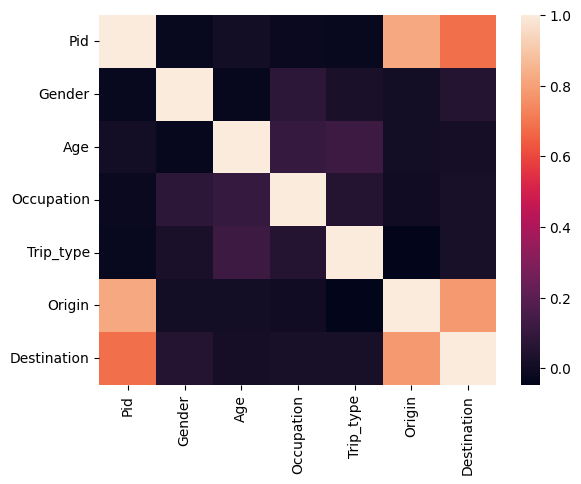

In [673]:
#Correlation plot

sns.heatmap(df1.corr())

In [674]:
df_Zone = pd.read_csv('/Users/akashpatel/Downloads/ieee-bigdata-cup-2022-destination-prediction/Zone_features/Zone_features/Tokyo_zone_feature_area.csv')

In [675]:
df_Zone.head()

,ZONE_ID,T000918002,T000918006,T000918021,T000918025,T000847001
0,100,17.997728,331.128339,2814.349670,21589.800171,179.328433
1,101,33.522479,601.750328,4566.073397,20151.124284,3551.697613
2,102,179.612460,2754.747270,10573.439547,183664.745235,1106.984438
3,103,128.735198,3527.181556,18151.752537,184695.318024,102.987980
4,110,50.396136,1607.310595,3285.225513,48681.330840,3164.807818


In [676]:
df_Zone.rename(columns={"T000918002": "business_secondary"},inplace=True)
df_Zone.rename(columns={"T000918006": "employees_secondary"},inplace=True)
df_Zone.rename(columns={"T000918021": "business_tertiary"},inplace=True)
df_Zone.rename(columns={"T000918025": "employees_tertiary"},inplace=True)
df_Zone.rename(columns={"T000847001": "Night_Population"},inplace=True)


In [677]:
df_Zone.head()

print(df_Zone.shape)

(1316, 6)


In [678]:
#dffinal = pd.merge(df,dfz)
df_1 = df.merge(df_Zone, left_on='Origin', right_on='ZONE_ID')
df_full = df_1.merge(df_Zone, left_on='Destination', right_on='ZONE_ID', suffixes=('_origin', '_destination'))
df_full.head()

,Pid,Gender,Age,Occupation,Trip_type,Origin,Destination,ZONE_ID_origin,business_secondary_origin,employees_secondary_origin,business_tertiary_origin,employees_tertiary_origin,Night_Population_origin,ZONE_ID_destination,business_secondary_destination,employees_secondary_destination,business_tertiary_destination,employees_tertiary_destination,Night_Population_destination
0,264045,2,10,9,1,11412,11414,11412,37.423107,246.145385,186.062332,2443.218732,11362.425603,11414,30.238568,104.427402,174.695889,1086.993801,10595.167122
1,278999,2,7,14,9,11412,11414,11412,37.423107,246.145385,186.062332,2443.218732,11362.425603,11414,30.238568,104.427402,174.695889,1086.993801,10595.167122
2,278999,2,7,14,9,11412,11414,11412,37.423107,246.145385,186.062332,2443.218732,11362.425603,11414,30.238568,104.427402,174.695889,1086.993801,10595.167122
3,263402,1,11,15,8,11412,11414,11412,37.423107,246.145385,186.062332,2443.218732,11362.425603,11414,30.238568,104.427402,174.695889,1086.993801,10595.167122
4,264044,1,11,9,1,11412,11414,11412,37.423107,246.145385,186.062332,2443.218732,11362.425603,11414,30.238568,104.427402,174.695889,1086.993801,10595.167122


In [679]:
df_full.corr()

,Pid,Gender,Age,Occupation,Trip_type,Origin,Destination,ZONE_ID_origin,business_secondary_origin,employees_secondary_origin,business_tertiary_origin,employees_tertiary_origin,Night_Population_origin,ZONE_ID_destination,business_secondary_destination,employees_secondary_destination,business_tertiary_destination,employees_tertiary_destination,Night_Population_destination
Pid,1.000000,-0.028338,-0.005151,-0.018296,-0.014681,0.762825,0.615336,0.762825,-0.305575,-0.202640,-0.165514,-0.148473,-0.441478,0.615336,-0.206589,-0.160306,-0.127457,-0.132274,-0.309049
Gender,-0.028338,1.000000,-0.026831,0.077091,0.022056,0.013777,0.064002,0.013777,-0.038526,-0.038370,-0.049972,-0.044838,0.020044,0.064002,-0.090105,-0.078708,-0.097816,-0.086575,0.020615
Age,-0.005151,-0.026831,1.000000,0.102199,0.120657,-0.005781,0.007758,-0.005781,0.014418,0.030678,0.017119,0.024562,-0.013879,0.007758,0.018595,0.025394,0.010408,0.015408,-0.005826
Occupation,-0.018296,0.077091,0.102199,1.000000,0.051812,-0.000871,0.022786,-0.000871,-0.027052,-0.029219,-0.032627,-0.031051,0.001191,0.022786,-0.046196,-0.047069,-0.051728,-0.050008,0.007037
Trip_type,-0.014681,0.022056,0.120657,0.051812,1.000000,-0.045321,0.022703,-0.045321,0.058192,0.078896,0.072085,0.077634,0.005288,0.022703,-0.039149,-0.038746,-0.049543,-0.044612,0.010047
Origin,0.762825,0.013777,-0.005781,-0.000871,-0.045321,1.000000,0.753373,1.000000,-0.384297,-0.337392,-0.300162,-0.297569,-0.382924,0.753373,-0.231285,-0.210921,-0.173763,-0.186162,-0.264328
Destination,0.615336,0.064002,0.007758,0.022786,0.022703,0.753373,1.000000,0.753373,-0.287069,-0.246816,-0.214979,-0.212870,-0.333785,1.000000,-0.421053,-0.395317,-0.358737,-0.371478,-0.329604
ZONE_ID_origin,0.762825,0.013777,-0.005781,-0.000871,-0.045321,1.000000,0.753373,1.000000,-0.384297,-0.337392,-0.300162,-0.297569,-0.382924,0.753373,-0.231285,-0.210921,-0.173763,-0.186162,-0.264328
business_secondary_origin,-0.305575,-0.038526,0.014418,-0.027052,0.058192,-0.384297,-0.287069,-0.384297,1.000000,0.698520,0.678238,0.590020,0.425635,-0.287069,0.457546,0.319398,0.289841,0.272229,0.266947
employees_secondary_origin,-0.202640,-0.038370,0.030678,-0.029219,0.078896,-0.337392,-0.246816,-0.337392,0.698520,1.000000,0.790415,0.931926,0.144019,-0.246816,0.330251,0.413160,0.319379,0.376364,0.119592


<Axes: >

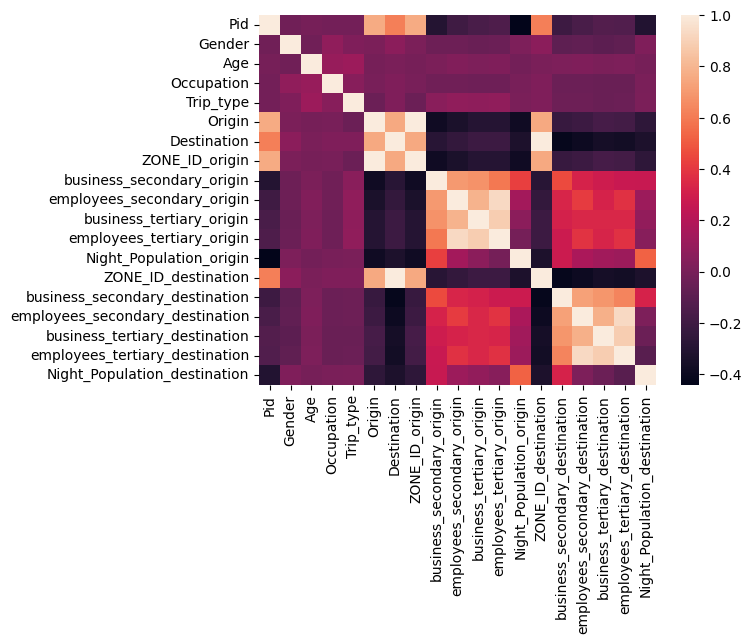

In [680]:
sns.heatmap(df_full.corr())

In [682]:
df_try = df_full


In [683]:
df_try.head()

,Pid,Gender,Age,Occupation,Trip_type,Origin,Destination,ZONE_ID_origin,business_secondary_origin,employees_secondary_origin,business_tertiary_origin,employees_tertiary_origin,Night_Population_origin,ZONE_ID_destination,business_secondary_destination,employees_secondary_destination,business_tertiary_destination,employees_tertiary_destination,Night_Population_destination
0,264045,2,10,9,1,11412,11414,11412,37.423107,246.145385,186.062332,2443.218732,11362.425603,11414,30.238568,104.427402,174.695889,1086.993801,10595.167122
1,278999,2,7,14,9,11412,11414,11412,37.423107,246.145385,186.062332,2443.218732,11362.425603,11414,30.238568,104.427402,174.695889,1086.993801,10595.167122
2,278999,2,7,14,9,11412,11414,11412,37.423107,246.145385,186.062332,2443.218732,11362.425603,11414,30.238568,104.427402,174.695889,1086.993801,10595.167122
3,263402,1,11,15,8,11412,11414,11412,37.423107,246.145385,186.062332,2443.218732,11362.425603,11414,30.238568,104.427402,174.695889,1086.993801,10595.167122
4,264044,1,11,9,1,11412,11414,11412,37.423107,246.145385,186.062332,2443.218732,11362.425603,11414,30.238568,104.427402,174.695889,1086.993801,10595.167122


In [684]:
df_try1 = df_try.groupby("Age", group_keys=False).count()  # Group by a column and calculate the mean
#Avg_delay_min = df.groupby('Delay Minutes').mean()
df_try1

,Pid,Gender,Occupation,Trip_type,Origin,Destination,ZONE_ID_origin,business_secondary_origin,employees_secondary_origin,business_tertiary_origin,employees_tertiary_origin,Night_Population_origin,ZONE_ID_destination,business_secondary_destination,employees_secondary_destination,business_tertiary_destination,employees_tertiary_destination,Night_Population_destination
Age,,,,,,,,,,,,,,,,,,
1,33396,33396,33396,33396,33396,33396,33396,33396,33396,33396,33396,33396,33396,33396,33396,33396,33396,33396
2,32354,32354,32354,32354,32354,32354,32354,32354,32354,32354,32354,32354,32354,32354,32354,32354,32354,32354
3,25544,25544,25544,25544,25544,25544,25544,25544,25544,25544,25544,25544,25544,25544,25544,25544,25544,25544
4,26746,26746,26746,26746,26746,26746,26746,26746,26746,26746,26746,26746,26746,26746,26746,26746,26746,26746
5,37103,37103,37103,37103,37103,37103,37103,37103,37103,37103,37103,37103,37103,37103,37103,37103,37103,37103
6,57713,57713,57713,57713,57713,57713,57713,57713,57713,57713,57713,57713,57713,57713,57713,57713,57713,57713
7,74240,74240,74240,74240,74240,74240,74240,74240,74240,74240,74240,74240,74240,74240,74240,74240,74240,74240
8,67309,67309,67309,67309,67309,67309,67309,67309,67309,67309,67309,67309,67309,67309,67309,67309,67309,67309
9,54023,54023,54023,54023,54023,54023,54023,54023,54023,54023,54023,54023,54023,54023,54023,54023,54023,54023


In [685]:
from torch_geometric.data import Data
l = len(df['Pid'])
print(l)


790613


In [686]:
#df_sample = df.sample(n=100)
df_Zone["ZONE_ID"].nunique()

1316

In [689]:
#G.add_nodes_from([2, 3])
import numpy as np

df_edges = filtered_df.drop_duplicates(subset=['Origin', 'Destination'])
df_edges.shape

e1 = np.array(filtered_df["Origin"]).reshape((-1,1))
e2 = np.array(filtered_df["Destination"]).reshape((-1,1))
print (e1.shape, e2.shape)
e = np.unique(np.vstack((e1,e2)).squeeze()).tolist()
mapped_zone_id_vs_zone_id = {val: i for i, val in enumerate(e)}


# identity_matrix = identity_matrix = np.eye(len(df_sample["Origin"]))
# n = np.dot(identity_matrix, df_sample["Origin"])
# print(n)

print (len(mapped_zone_id_vs_zone_id))


(68400, 1) (68400, 1)
1640


In [690]:
filtered_df['mapped_Origin'] = filtered_df['Origin'].apply(lambda x : mapped_zone_id_vs_zone_id[x])
filtered_df['mapped_Destination'] = filtered_df['Destination'].apply(lambda x : mapped_zone_id_vs_zone_id[x])

/var/folders/cm/gydxnn213wnfgk1p3pqs31x40000gn/T/ipykernel_44844/989407371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['mapped_Origin'] = filtered_df['Origin'].apply(lambda x : mapped_zone_id_vs_zone_id[x])
/var/folders/cm/gydxnn213wnfgk1p3pqs31x40000gn/T/ipykernel_44844/989407371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['mapped_Destination'] = filtered_df['Destination'].apply(lambda x : mapped_zone_id_vs_zone_id[x])


In [691]:
filtered_df

,Pid,Departure_time,Gender,Age,Occupation,Trip_type,Origin,Destination,mapped_Origin,mapped_Destination
9,260471,2008-10-01 11:50:00,2,10,99,5,11302,10132,468,425
10,262161,2008-10-01 07:35:00,1,13,15,5,12231,12231,512,512
27,276257,2008-10-01 19:10:00,1,6,8,5,11102,10222,444,435
28,276257,2008-10-01 21:50:00,1,6,8,5,10222,10220,435,433
29,276257,2008-10-01 23:15:00,1,6,8,5,10220,11221,433,460
...,...,...,...,...,...,...,...,...,...,...
790516,374414,2008-10-01 16:15:00,2,2,11,5,60800,60800,1629,1629
790549,376069,2008-10-01 15:00:00,2,12,14,5,60600,220,1614,18
790553,360411,2008-10-01 18:00:00,1,5,8,5,23131,23135,720,724
790565,369759,2008-10-01 18:45:00,1,14,3,5,60000,60000,1582,1582


In [692]:
filtered_df['mapped_Origin'].nunique()

# Set the threshold value
threshold = 1300

# Filter column values below the threshold
filtered_df_final = filtered_df[filtered_df['mapped_Origin'] < threshold]

filtered_df_final = filtered_df[filtered_df['mapped_Destination'] < threshold]


print("\nFiltered DataFrame:")
print(filtered_df_final)

exists = (filtered_df_final['mapped_Origin'] == 1384).any()

if exists:
    print(f"The value {1384} exists in the column.")
else:
    print(f"The value {1384} does not exist in the column.")



Filtered DataFrame:
           Pid       Departure_time  Gender  Age  Occupation  Trip_type  \
9       260471  2008-10-01 11:50:00       2   10          99          5   
10      262161  2008-10-01 07:35:00       1   13          15          5   
27      276257  2008-10-01 19:10:00       1    6           8          5   
28      276257  2008-10-01 21:50:00       1    6           8          5   
29      276257  2008-10-01 23:15:00       1    6           8          5   
...        ...                  ...     ...  ...         ...        ...   
790498  360811  2008-10-01 13:17:00       1    8           8          5   
790500  360811  2008-10-01 21:47:00       1    8           8          5   
790549  376069  2008-10-01 15:00:00       2   12          14          5   
790553  360411  2008-10-01 18:00:00       1    5           8          5   
790570  363081  2008-10-01 14:00:00       1    1          11          5   

        Origin  Destination  mapped_Origin  mapped_Destination  
9        1130

In [693]:
ed1 = np.array(filtered_df_final["mapped_Origin"])
ed2 = np.array(filtered_df_final["mapped_Destination"])

ed = np.column_stack((ed1,ed2)).T
ed.shape

(2, 60847)

In [694]:
a1 = np.array(df_Zone["ZONE_ID"])
b1 = np.array(df_Zone["business_secondary"])
c1 = np.array(df_Zone["employees_secondary"])
d1 = np.array(df_Zone["business_tertiary"])
e1 = np.array(df_Zone["employees_tertiary"])
f1 = np.array(df_Zone["Night_Population"])
n = np.column_stack((a1,b1,c1,d1,e1,f1))

print(n)



[[1.00000000e+00 1.79977281e+01 3.31128339e+02 2.81434967e+03
  2.15898002e+04 1.79328433e+02]
 [2.00000000e+00 3.35224794e+01 6.01750328e+02 4.56607340e+03
  2.01511243e+04 3.55169761e+03]
 [3.00000000e+00 1.79612460e+02 2.75474727e+03 1.05734395e+04
  1.83664745e+05 1.10698444e+03]
 ...
 [1.31400000e+03 1.51497451e+01 5.55454393e+01 1.64364726e+02
  7.72796174e+02 1.48463420e+03]
 [1.31500000e+03 2.58006604e+01 5.14673394e+01 5.53953224e+02
  5.98746920e+02 2.21594492e+03]
 [1.31600000e+03 2.64928008e+01 3.45776692e+01 2.19749533e+02
  4.55982594e+02 1.67523421e+03]]


In [695]:
# num_features = 3
# num_classes = 1652
# num_nodes = 1652
# num_edges = 100

In [696]:
edge_index = torch.tensor(ed, dtype=torch.long)
x = torch.tensor((n), dtype=torch.float)

In [697]:
data = Data(x=x, edge_index=edge_index)
data

Data(x=[1316, 6], edge_index=[2, 60847])

In [701]:
#import shapefile
df_shape = gpd.read_file('/Users/akashpatel/Downloads/ieee-bigdata-cup-2022-destination-prediction 2/Zones/Zones/Tokyo/Tokyo.shp')

In [702]:
df_shape

,ZONE_ID,geometry
0,100,"POLYGON ((139.75883 35.69017, 139.75985 35.690..."
1,101,"POLYGON ((139.75574 35.69201, 139.75581 35.691..."
2,102,"POLYGON ((139.76814 35.68859, 139.76839 35.688..."
3,103,"POLYGON ((139.77061 35.68372, 139.77060 35.683..."
4,110,"POLYGON ((139.74437 35.68321, 139.74439 35.683..."
...,...,...
1650,60901,"POLYGON ((139.70436 35.96331, 139.70523 35.962..."
1651,60910,"POLYGON ((139.74902 35.92709, 139.74911 35.927..."
1652,60920,"POLYGON ((139.71215 35.96520, 139.71226 35.965..."
1653,60930,"POLYGON ((139.70791 35.99550, 139.70791 35.995..."


<Axes: >

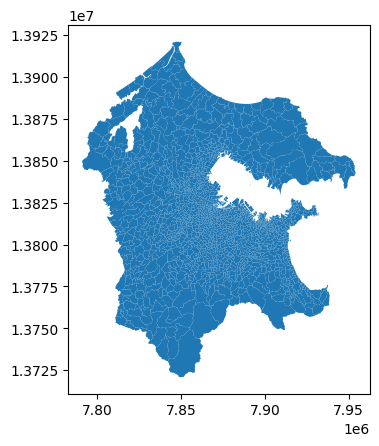

In [703]:
from shapely.geometry import Polygon, LineString, Point
df_shape = df_shape.to_crs("2154")
df_shape.plot()

In [704]:
#plotting the centroids from shapefile
df_shape_centroid = df_shape.centroid

In [705]:
gdf_df_shape_centroid = gpd.GeoDataFrame(
    df_shape["ZONE_ID"], geometry=df_shape_centroid, crs="EPSG:2154"
)

In [ ]:
gdf_df_shape_centroid.plot()

In [ ]:
#plt.plot(df['Trip_type'],df['Occupation']) 
plt.plot(df['Trip_type'], df['Pid'])
plt.show()


In [ ]:
plt.bar(df['Trip_type'], df['Pid'])
plt.show()

# K-Nearest Model

In [ ]:
#K-nearest Model
columns_X = ['Trip_type', 'Occupation', 'Age', 'Gender']
columns_y = ['Origin','Destination']
X = df_full[columns_X]
y = df_full[columns_y]

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print ('X: ({}, {})'.format(*X.shape))
print ('y: ({}, {})'.format(*y.shape))
print ('X_train: ({}, {})'.format(*X_train.shape))
print ('y_train: ({}, {})'.format(*y_train.shape))
print ('X_test: ({}, {})'.format(*X_test.shape))
print ('y_test: ({}, {})'.format(*y_test.shape))

In [ ]:
#importing libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
# Funtion for cross-validation over a grid of parameters

def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print ("BEST", gs.best_params_, gs.best_score_, gs.cv_results_)
    best = gs.best_estimator_
    return best

In [ ]:
# Create a k-Nearest Neighbors Regression estimator
knn_estimator = KNeighborsRegressor()
#knn_parameters = {"n_neighbors": [1,2,5,10,20,50,100]}
knn_parameters = {"n_neighbors": [1,2,5]}
knn_best = cv_optimize(knn_estimator, knn_parameters, X_train, y_train, score_func='neg_mean_squared_error')

In [ ]:
# Fit the best Random Forest and calculate R^2 values for training and test sets
knn_reg=knn_best.fit(X_train, y_train)
knn_training_accuracy = knn_reg.score(X_train, y_train)
knn_test_accuracy = knn_reg.score(X_test, y_test)
print ("############# based on standard predict ################")
print ("R^2 on training data: %0.8f" % (knn_training_accuracy))
print ("R^2 on test data:     %0.8f" % (knn_test_accuracy))

In [ ]:
# Calculate the Root Mean Squared Error
np.sqrt(mean_squared_error(knn_reg.predict(X_test),y_test))

In [ ]:
sampleds = pd.DataFrame(df_full, columns=(columns_X + columns_y))
sampleds = sampleds.sample(10)
sampleds

In [ ]:
y_pred = knn_reg.predict(sampleds.iloc[:,:-2])
y_pred

In [ ]:
Pid_origin = dict(df_full.groupby('Pid')['Origin'].apply(list))
#Pid_origin()

In [ ]:
from sklearn.preprocessing import LabelEncoder

PID_encoder = LabelEncoder()
origin_encoder = LabelEncoder()
df_full['Pid'] = PID_encoder.fit_transform(df.Pid )
df_full['Origin']= origin_encoder.fit_transform(df.origin.apply(str))
df.head()